In [1]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [2]:
from pyTVDN import TVDNDetect
from pathlib import Path
from scipy.io import loadmat
import numpy as np
import time as Time
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [3]:
resDir = Path("../results")
dataDir = Path("../data")

In [4]:
filname = Path("subj2.mat")
MEG = loadmat(dataDir/filname)["DK_timecourse"]

##  Object without screening step

In [5]:
MEGdet = TVDNDetect(Ymat=MEG, saveDir="../results", dataType="MEG", fName="subj2", r=8, kappa=2.95, freq=60)

The parameters for detection are:
{'Lmin': 60,
 'MaxM': 19,
 'T': 2,
 'decimateRate': 10,
 'downRate': 20,
 'fName': 'subj2',
 'fct': 0.5,
 'freq': 60,
 'is_detrend': False,
 'kappa': 2.95,
 'lamb': 0.0001,
 'plotfct': 30,
 'r': 8}


### Detection

In [6]:
MEGdet()

### Tuning kappa based on MSE

In [7]:
kappas = np.linspace(2.5, 3, 100)
MEGdet.TuningKappa(kappas)

### Update the estimated change point set

In [8]:
MEGdet.UpdateEcpts()

## Object with screening step

In [9]:
MEGscan= TVDNDetect(Ymat=MEG, saveDir=None, dataType="MEG", fName="subj2_screen", r=8, kappa=2.95, freq=60)

The parameters for detection are:
{'Lmin': 60,
 'MaxM': 19,
 'T': 2,
 'decimateRate': 10,
 'downRate': 20,
 'fName': 'subj2_screen',
 'fct': 0.5,
 'freq': 60,
 'is_detrend': False,
 'kappa': 2.95,
 'lamb': 0.0001,
 'plotfct': 30,
 'r': 8}


### screening step

In [10]:
MEGscan.Screening(wh=5)

R[write to console]: 
Attaching package: ‘signal’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, poly




### Detection

In [22]:
MEGscan()

### Tuning kappa based on MSE

In [24]:
kappas = np.linspace(2.5, 3, 100)
MEGscan.TuningKappa(kappas)

### Update the estimated change point set

In [25]:
MEGscan.UpdateEcpts()

## Compare the results

### Results

In [26]:
print(MEGdet)

+-------------+--------------------------------------------------------------------------+--------------------+------+
| Num of CPTs |                              Estiamted CPTs                              |        MSE         | Rank |
+-------------+--------------------------------------------------------------------------+--------------------+------+
|      13     | [ 153.  515.  776. 1045. 1218. 1523. 1781. 2084. 2365. 2697. 2936. 3107. | 0.3798390489436148 |  8   |
|             |                                  3384.]                                  |                    |      |
+-------------+--------------------------------------------------------------------------+--------------------+------+


In [27]:
print(MEGscan)

+-------------+--------------------------------------------------------------------------+--------------------+------+
| Num of CPTs |                              Estiamted CPTs                              |        MSE         | Rank |
+-------------+--------------------------------------------------------------------------+--------------------+------+
|      14     | [ 143.  499.  767. 1051. 1212. 1515. 1906. 2084. 2335. 2483. 2723. 2906. | 0.4244291209876865 |  8   |
|             |                               3100. 3385.]                               |                    |      |
+-------------+--------------------------------------------------------------------------+--------------------+------+


### Estimated change point plot

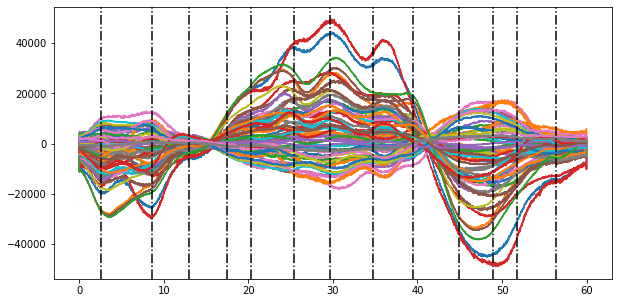

In [28]:
MEGdet.PlotEcpts()

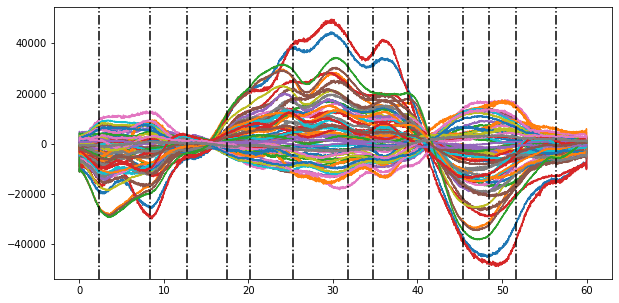

In [29]:
MEGscan.PlotEcpts()

### Plot the reconstructed curves

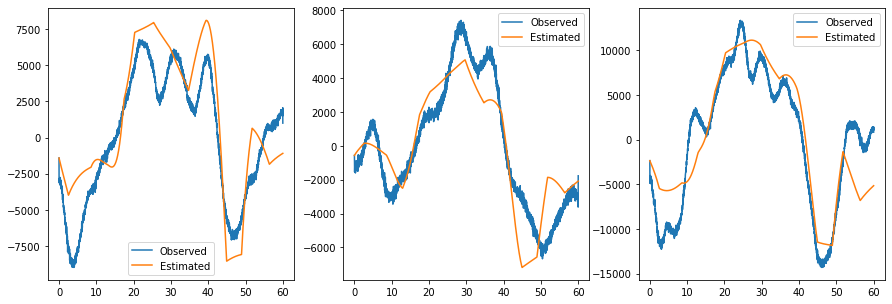

In [30]:
MEGdet.PlotRecCurve([43, 45, 59])

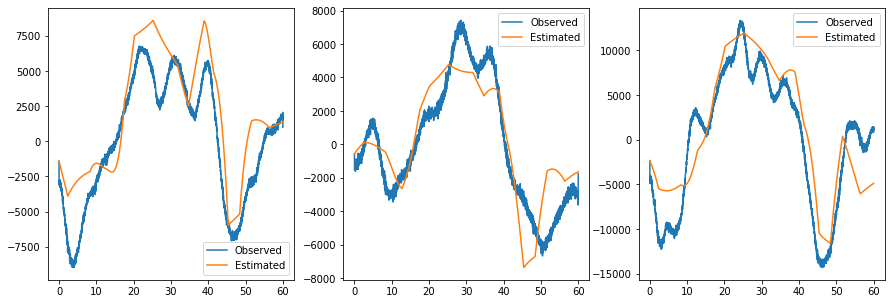

In [31]:
MEGscan.PlotRecCurve([43, 45, 59])

### Plot the eigen curves

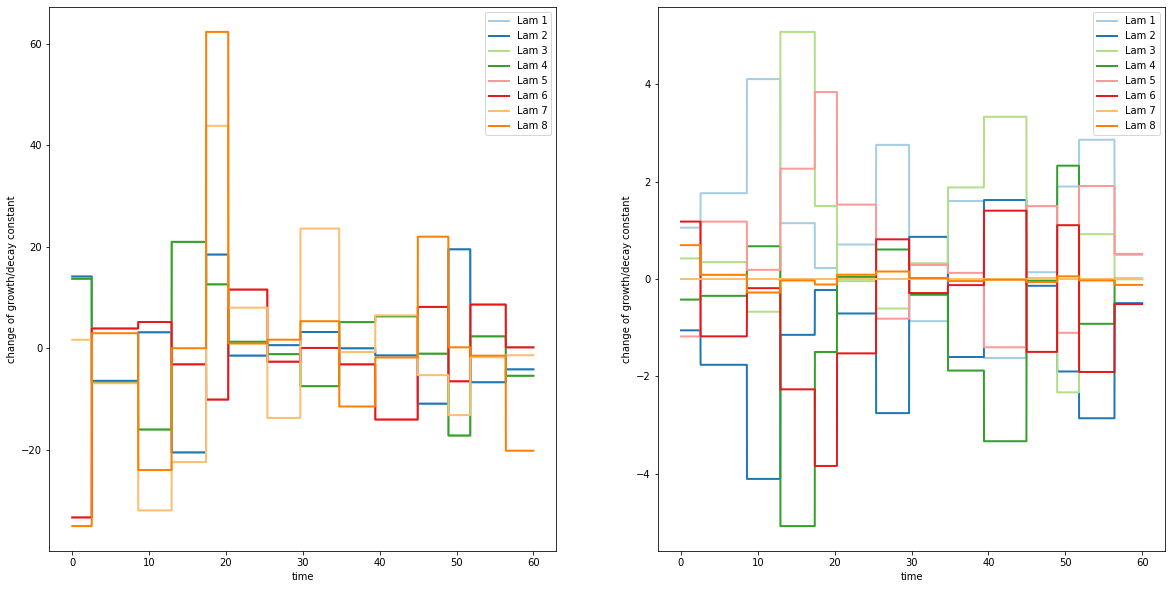

In [32]:
MEGdet.PlotEigenCurve()

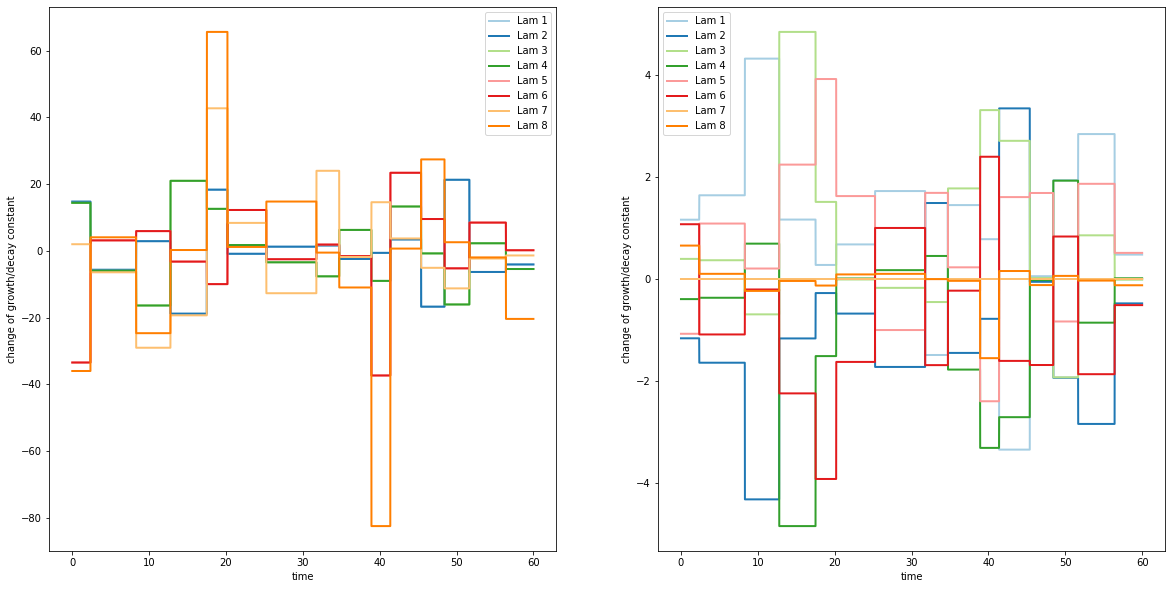

In [33]:
MEGscan.PlotEigenCurve()